In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Create synthetic dataset
X, y = make_classification(
    n_samples=1000,   # number of samples
    n_features=10,    # number of features
    n_informative=5,  # number of useful features
    n_redundant=2,    # redundant features
    n_classes=3,      # number of classes
    random_state=42
)

# Optional: create a DataFrame
X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(10)])


In [2]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define model
model = LogisticRegression(max_iter=1000)

# Define K-fold strategy (e.g., 5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model with cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Fold Accuracies: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Fold Accuracies: [0.67  0.71  0.665 0.73  0.735]
Mean Accuracy: 0.702 ± 0.029


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print("Random Forest Mean Accuracy:", rf_scores.mean())

# SVM
svm_model = SVC(kernel='rbf', gamma='scale')
svm_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')
print("SVM Mean Accuracy:", svm_scores.mean())


Random Forest Mean Accuracy: 0.8400000000000001
SVM Mean Accuracy: 0.859


/tmp/ipython-input-1192968498.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores, rf_scores, svm_scores], labels=['LogReg', 'RF', 'SVM'])


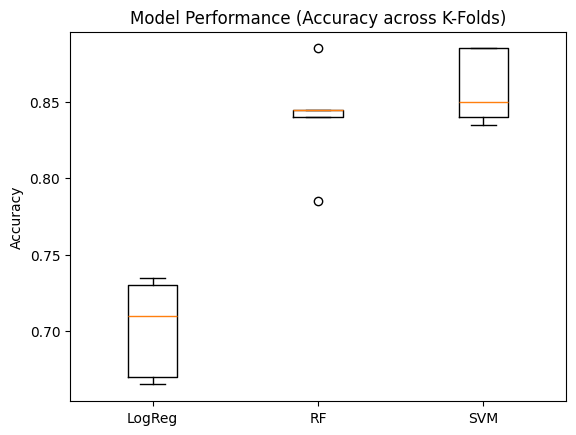

In [4]:
import matplotlib.pyplot as plt

plt.boxplot([scores, rf_scores, svm_scores], labels=['LogReg', 'RF', 'SVM'])
plt.title('Model Performance (Accuracy across K-Folds)')
plt.ylabel('Accuracy')
plt.show()
